In [26]:
import mne
import os
os.chdir('C:\\Users\\Esimk_000\\Desktop\\School\\Spring 2018\\Cs59866\\EEG Project\\seniorprojecteeg-master-fork\\preprocessing\\Artifact_Removal')
%run preprocecssing_helpers.ipynb
%run Batch_ArtifactFilter_Epoch.ipynb
import time
import mne
from mne.preprocessing import ICA
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)
matplotlib.rcParams.update({'font.size': 15})

In [11]:
path = 'F:/EEGLAB/'
eeglab_files = list_eeglab_files(path)

In [12]:
eeglab_files

['F:/EEGLAB/SA20131216\\20131216_1310.set',
 'F:/EEGLAB/SA20131216\\20131216_1441.set',
 'F:/EEGLAB/SA20140205\\20140205_1114.set',
 'F:/EEGLAB/SA20140205\\20140205_1230.set',
 'F:/EEGLAB/SA20140206\\20140206_1029.set',
 'F:/EEGLAB/SA20140206\\20140206_1151.set',
 'F:/EEGLAB/SA20140207\\20140207_1146.set',
 'F:/EEGLAB/SA20140207\\20140207_1219.set',
 'F:/EEGLAB/SA20140217\\20140217_1136.set',
 'F:/EEGLAB/SA20140217\\20140217_1211.set',
 'F:/EEGLAB/SA20140219\\20140219_1046.set',
 'F:/EEGLAB/SA20140219\\20140219_1205.set',
 'F:/EEGLAB/SA20140220\\20140220_1009.set',
 'F:/EEGLAB/SA20140220\\20140220_1123.set',
 'F:/EEGLAB/SA20140225\\20140225_1422.set',
 'F:/EEGLAB/SA20140225\\20140225_1552.set',
 'F:/EEGLAB/SA20140227A\\20140227_1058.set',
 'F:/EEGLAB/SA20140227A\\20140227_1220.set',
 'F:/EEGLAB/SA20140227B\\20140227_1410.set']

In [13]:
raw = mne.io.read_raw_eeglab(eeglab_files[4],preload = True)

Reading F:/EEGLAB/SA20140206\20140206_1029.fdt
Reading 0 ... 813578  =      0.000 ...  1589.020 secs...


In [7]:
epoch = remove_artifacts_and_create_epochs(raw)

5792 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
time difference 1.74609375
[82151     0    16]
[83045     0   130]

 **1 bad trials dropped**
Setting up band-stop filter
Filter length of 3379 samples (6.600 sec) selected
Setting up band-pass filter from 5 - 1e+02 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 25.0 Hz
Filter length of 845 samples (1.650 sec) selected
5792 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  52 tasks      | elapsed:   15.9s
[Parallel(n_jobs=10)]: Done 129 out of 129 | elapsed:   28.1s finished


5384 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]
Fitting ICA to data using 128 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 128
Fitting ICA took 756.0s.
    Searching for artifacts...
Artifact indices found:
    
Ready.
Transforming to ICA space (128 components)
Zeroing out 0 ICA components
1917 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 1917 events and 500 original time points ...
968 bad epochs dropped


In [8]:
os.chdir("F:\\")
epoch.save(eeglab_files[4].split('\\')[-1].split('.')[0] + "_epo.fif", verbose = True)

In [9]:
events = find_events(raw)
eeglab_trials = get_trials(events)
eeglab_trials[1:3]

5384 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


[[array([3992,  136,   31], dtype=int64),
  array([3993,    0,  136], dtype=int64),
  array([3995,    0,  156], dtype=int64),
  array([4000,    0,   11], dtype=int64),
  array([4138,    0,   12], dtype=int64),
  array([4263,    0,   10], dtype=int64),
  array([4539,  133,  132], dtype=int64),
  array([4541,    0,  133], dtype=int64)],
 [array([4689,    0,   31], dtype=int64),
  array([4691,  156,  143], dtype=int64),
  array([4692,    0,  156], dtype=int64),
  array([4698,    0,   11], dtype=int64),
  array([4836,    0,   12], dtype=int64),
  array([4965,    0,   10], dtype=int64),
  array([5088,    0,  131], dtype=int64),
  array([5100,    0,  134], dtype=int64)]]

In [5]:
def get_epoch_trials(epoch_object):
    #note: third stim-code has a value that is 1 more than the first.
    events = epoch_object.events
    found_first_stim_code = False
    found_second_stim_code = False
    found_third_stim_code = False
    current_trial = []
    trials = []
    for event in events:
        if not found_first_stim_code and not found_second_stim_code and not found_third_stim_code: #still searching for the end of trial
            current_trial.append(event)
            found_first_stim_code = True
            first_stim_code = event
        elif not found_second_stim_code and not found_third_stim_code:
            current_trial.append(event)
            found_second_stim_code = True
        elif not found_third_stim_code and (event[-1] + 1) == first_stim_code[-1]: 
            current_trial.append(event)
            found_third_stim_code = True
            trials.append(current_trial)
            current_trial = []
            found_first_stim_code = False
            found_second_stim_code = False
            found_third_stim_code = False
        elif not found_third_stim_code and (event[-1] + 1) != first_stim_code[-1]:
            # there is no third event, trial is unfinished.
            current_trial = []
            current_trial.append(event)#assuming it's first stim-code...for now
            found_first_stim_code = True
    return trials

In [6]:
def isCorrect_stim_code_trials(trials):
    """
    Description:
        A sanity check that makes sure all trials are in the correct order
        The third stim-code needs to have a value that is one less than the 
        first stim-code.
        
    Variables:
        trials: An ndarray of shape  (n_trials, 3, 3)
    -----
    returns:
        boolean if all are correct, or one is incorrect. 
        It will print all incorrect trials
    """
    has_incorrect_trial = True
    for trial in trials:
        if trial[:,-1][0] == trial[:,-1][-1] + 1:
            pass
        else:
            print("Incorrect Trial \n: {0}".format(trial))
            has_incorrect_trial = False
            
                    
    return has_incorrect_trial

In [ ]:
isCorrect_stim_code_trials(epoch_trials)

In [17]:
epoch_trials.shape

(316, 3, 3)

In [12]:
epoch_trials = np.array(get_epoch_trials(epoch))

In [8]:
root_path = 'F:\\'

In [9]:
l_epoch = mne.read_epochs(os.path.join(root_path,'20140206_1029_epo.fif'), preload= True)

Reading F:\20140206_1029_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    1949.22 ms
        0 CTF compensation matrices available
949 matching events found
Applying baseline correction (mode: mean)
949 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [17]:
l_epoch.events[:10]

array([[ 8000,     0,    11],
       [ 8276,     0,    12],
       [ 8526,     0,    10],
       [ 9396,     0,    11],
       [ 9671,     0,    12],
       [ 9930,     0,    10],
       [10498,     0,    11],
       [10774,     0,    12],
       [11041,     0,    10],
       [11601,     0,    11]])

In [14]:
raw_events = find_events(raw)

5792 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


In [16]:
raw_events[:10]

array([[7671,    0,  131],
       [7983,    0,   31],
       [7986,    0,  136],
       [7989,    0,  156],
       [8000,    0,   11],
       [8276,    0,   12],
       [8526,    0,   10],
       [9077,    0,  132],
       [9080,    0,  133],
       [9082,    0,  129]], dtype=int64)

In [19]:
mne.find_events(raw)

5792 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  31 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 155 156 157 158 159 160 161 162 163 164 165]


array([[  7671,      0,    131],
       [  7983,      0,     31],
       [  7986,      0,    136],
       ...,
       [803567,      0,    132],
       [803794,      0,    134],
       [803797,      0,    129]], dtype=int64)

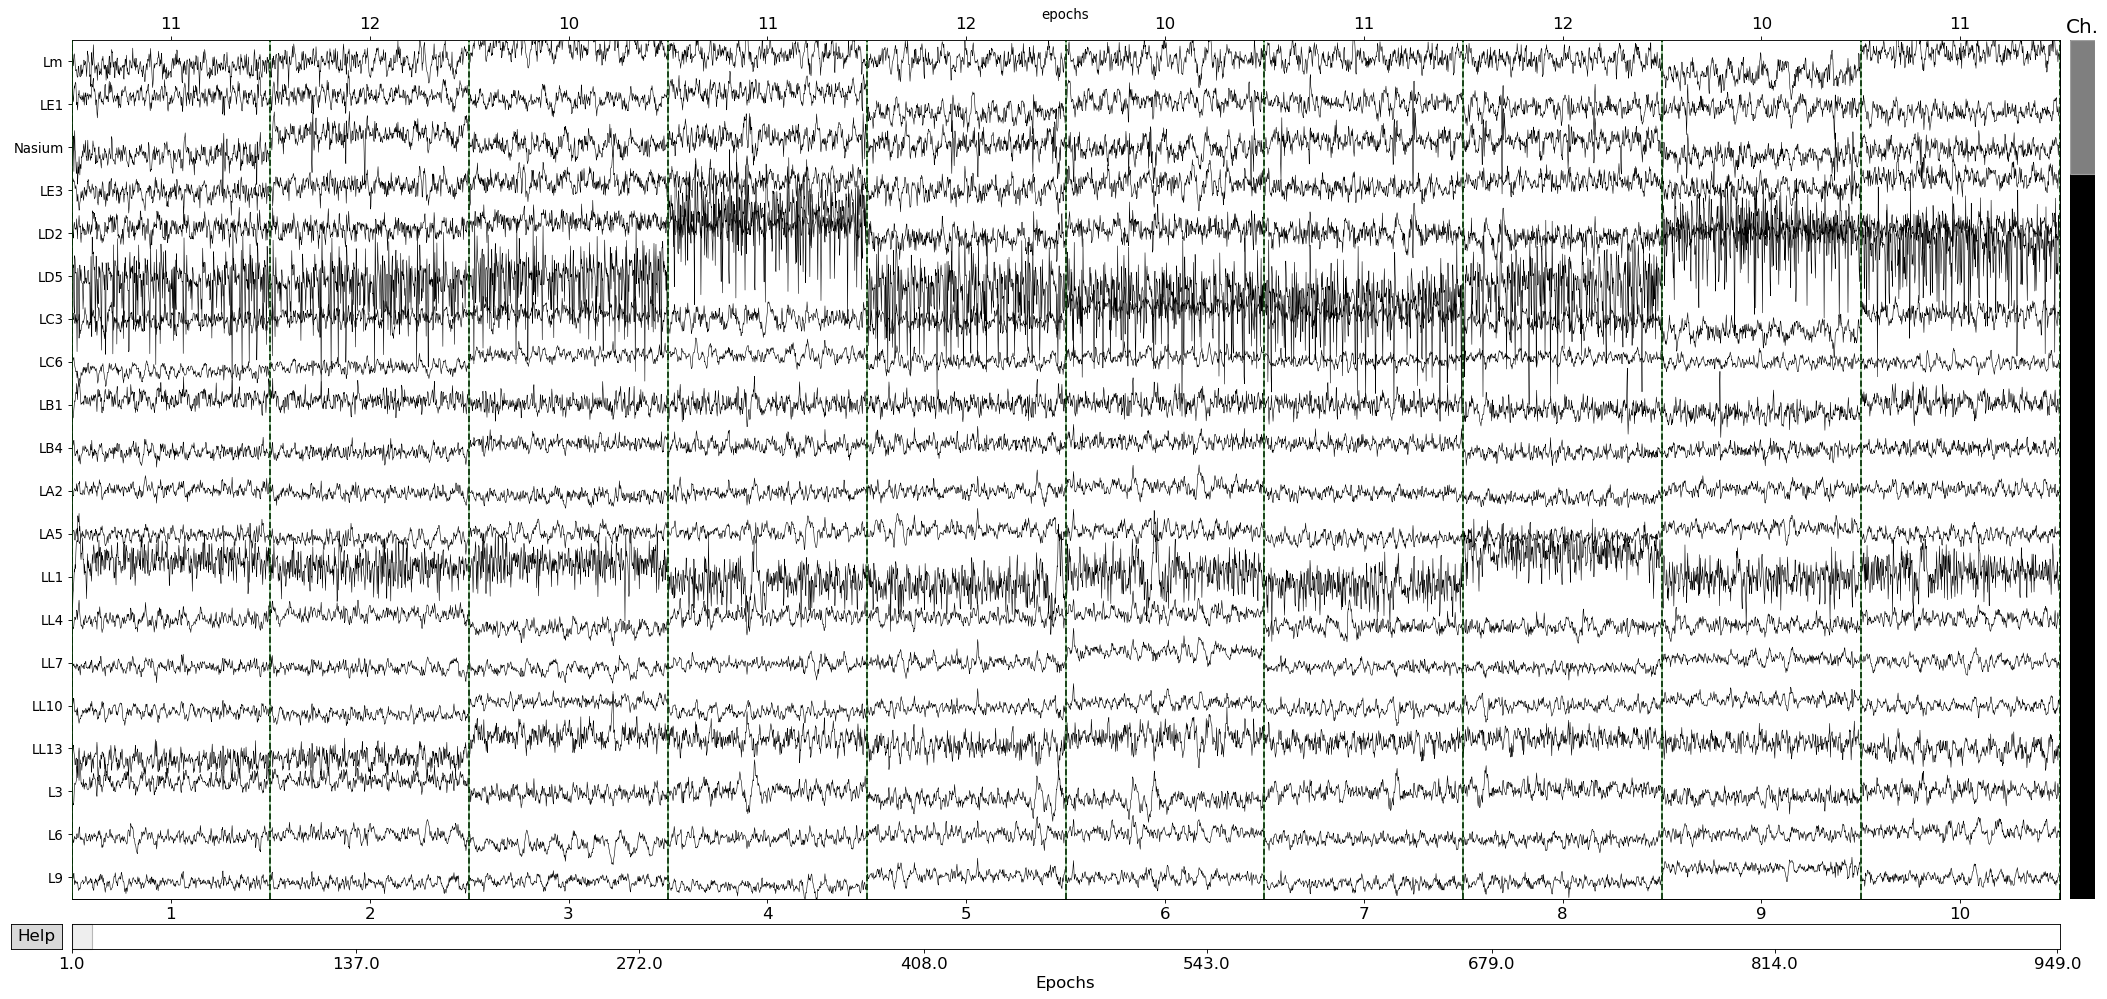

In [29]:
l_epoch.plot(n_epochs = 10, title = "epochs");

In [33]:
l_epoch.events[:10]

array([[ 8000,     0,    11],
       [ 8276,     0,    12],
       [ 8526,     0,    10],
       [ 9396,     0,    11],
       [ 9671,     0,    12],
       [ 9930,     0,    10],
       [10498,     0,    11],
       [10774,     0,    12],
       [11041,     0,    10],
       [11601,     0,    11]])

In [34]:
l_epoch.event_id

{'b-f2-wrd': 1,
 'b-f1-wrd': 2,
 'b-tg-wrd': 3,
 'b-f2-spk': 4,
 'b-f1-spk': 5,
 'b-tg-spk': 6,
 'b-f2-pic': 7,
 'b-f1-pic': 8,
 'b-tg-pic': 9,
 'b-f2-snd': 10,
 'b-f1-snd': 11,
 'b-tg-snd': 12,
 'f-f2-wrd': 13,
 'f-f1-wrd': 14,
 'f-tg-wrd': 15,
 'f-f2-spk': 16,
 'f-f1-spk': 17,
 'f-tg-spk': 18,
 'f-f2-pic': 19,
 'f-f1-pic': 20,
 'f-tg-pic': 21,
 'f-f2-snd': 22,
 'f-f1-snd': 23,
 'f-tg-snd': 24}